# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [21]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [22]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":1,"applicationTime":245,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1VbAgYGUQ==",licenseKey:"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [23]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":1,"applicationTime":245,"agent":""}
  </script>
  <script>
   (window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1Vb


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [24]:
table = soup.find('table',attrs={'class': 'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])
table

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


<table class="table table-striped text-sm text-lg-normal">
<thead>
<tr>
<th class="text-center">Date</th>
<th class="text-center">Market Cap</th>
<th class="text-center">Volume</th>
<th class="text-center">Open</th>
<th class="text-center">Close</th>
</tr>
</thead>
<tbody>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-30</th>
<td class="text-center">
$253,607,549,372
</td>
<td class="text-center">
$27,149,143,847
</td>
<td class="text-center">
$2,169.40
</td>
<td class="text-center">
N/A
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-29</th>
<td class="text-center">
$243,040,539,437
</td>
<td class="text-center">
$30,629,329,806
</td>
<td class="text-center">
$2,087.52
</td>
<td class="text-center">
$2,169.40
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-28</th>
<td class="text-center">
$229,354,016,311
</td>
<td class="text-center">
$24,316,408,028
</td>
<td class="text-center">
$1,973.93
</td>
<td class="text-c

In [25]:
test = table.find_all('tr',attrs={'class': ''})
test

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>, <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>, <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>, <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>, <

In [26]:
row_length = len(test)
row_length

548

Finding row length.

In [27]:
#testing if the find() works and understand the data pattern

test[1].find_all('td',attrs={'class':'text-center'})[0].text

'\n$253,607,549,372\n'

Do the scrapping process here (please change this markdown with your explanation)

In [28]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #get date
    date = test[i].th.text
    #get market cap
    market_cap = test[i].find_all('td', attrs={'class':'text-center'})[0].text
    market_cap = market_cap.strip('\n')
    
    #get volume
    volume = test[i].find_all('td', attrs={'class':'text-center'})[1].text
    volume = volume.strip('\n')
    
    #get open price
    open_price = test[i].find_all('td', attrs={'class':'text-center'})[2].text
    open_price = open_price.strip('\n')
    
    #get close price
    close_price = test[i].find_all('td', attrs={'class':'text-center'})[3].text
    close_price = close_price.strip('\n')
    temp.append((date,market_cap,volume,open_price,close_price))
    
temp

[('2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'),
 ('2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'),
 ('2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'),
 ('2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'),
 ('2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05'),
 ('2021-06-25',
  '$231,644,258,719',
  '$22,447,489,242',
  '$1,990.08',
  '$1,833.46'),
 ('2021-06-24',
  '$229,518,675,837',
  '$28,098,744,045',
  '$1,971.11',
  '$1,990.08'),
 ('2021-06-23',
  '$216,876,757,209',
  '$38,755,019,937',
  '$1,875.36',
  '$1,971.11'),
 ('2021-06-22',
  '$223,202,708,789',
  '$39,499,960,408',
  '$1,900.12',
  '$1,875.36'),
 ('2021-06-21',
  '$261,478,202,409',
  '$26,235,850,447',
  '$2,251.56',
  '$1,900.12'),
 ('2021-06-20',
  '$253,396,709,039',
  '$20,456,963,375',
  '$2,176.31',
  '$2,251.56'),
 ('2021-06-19',
  '$260,

## Creating data frame & Data wrangling

Put the array into dataframe

In [29]:
import pandas as pd

df = pd.DataFrame(temp, columns=('date','market_cap','volume','open_price', 'close_price'))
df = df[['date','volume']]

#Subset data pergerakan volume perdagangan dari Ethereum saja

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [30]:
df['date'] = pd.to_datetime(df['date'])
df['volume'] = df['volume'].str.replace("$","",regex=False)
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].astype('int64')

#df['market_cap'] = df['market_cap'].str.replace("$","").str.replace
#df['market_cap'] = df['market_cap'].str.replace(",","")
#df['open_price'] = df['open_price'].str.replace("$","")
#df['open_price'] = df['open_price'].str.replace(",","")
#df['close_price'] = df['close_price'].str.replace("$","")
#df['close_price'] = df['close_price'].replace('N/A',0)
#df['close_price'] = df['close_price'].str.replace(",","")


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [31]:
df = df.set_index('date')
#setting date as index

In [32]:
df

,volume
date,
2021-06-30,27149143847
2021-06-29,30629329806
2021-06-28,24316408028
2021-06-27,24249510321
2021-06-26,25981381067
...,...
2020-01-05,6958393690
2020-01-04,9655245100
2020-01-03,6497297884


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [18]:
import matplotlib.pyplot as plt

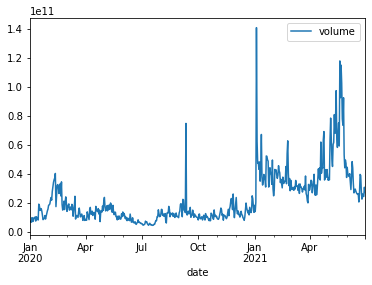

In [19]:
df.plot()

#### ANALYSIS OF ETHEREUM VOLUME STOCK



Ethereum volume stock overall increases during the observed period by 15 times. It started selling from USD 130 
and surging to USD 2.088 at end of Jun this year.

At the beginning of January 2021, which also marks the 12th birthday of Bitcoin’s Genesis block, Ethereum, together with the cryptocurrency market, hit a new all-time high. This is because Ethereum enjoyed some of the institutional attention bitcoin has attracted and this is set to grow in 2021 as CME launches its much-anticipated ETH futures.
Subsequently, the bullish trend stablized at the following month along with the whole Crypto market and continued to steadily rise until May 2021 - jumping from 36 bn volume sold to 54 bn volume sold per day. 
Nevertheless, Ethereum seems to remain an attractive choice of investment for crypto investors as the volume has increased notably for the past 1.5 years.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.